In [1]:
import tifffile
import numpy as np
from matplotlib import pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mutual_info_score, adjusted_rand_score

In [2]:
with tifffile.TiffFile("../dataset/labeled_data/train/train_XZ/tr_orig_XZ.tif") as tif:
    print("TRAIN", tif.pages[0].sizes)
    train_data = tif.asarray()

with tifffile.TiffFile("../dataset/labeled_data/train/train_XZ/tr_seg_XZ.tif") as tif:
    train_labels = tif.asarray()

with tifffile.TiffFile("../dataset/labeled_data/test/test_YZ/test_orig_YZ.tif") as tif:
    print("TEST", tif.pages[0].sizes)
    test_data = tif.asarray()

with tifffile.TiffFile("../dataset/labeled_data/test/test_YZ/test_seg_YZ.tif") as tif:
    test_labels = tif.asarray()

TRAIN {'height': 600, 'width': 600}
TEST {'height': 425, 'width': 425}


In [3]:
train_data = (train_data / 255).reshape((-1, 1))
train_labels = train_labels.flatten().astype(np.uint8)
test_data = (test_data / 255).reshape((-1, 1))
test_labels = test_labels.flatten().astype(np.uint8)

In [4]:
means = []
w = []
for l in range(1, 7):
    w.append(np.sum(test_labels == l) / test_labels.size)
    means.append(test_data[test_labels == l].mean())

means = np.asarray(means).reshape((-1, 1))
w = np.asarray(w)
w /= w.sum()

In [10]:
gmm = GaussianMixture(n_components=6, means_init=means, weights_init=w)

In [11]:
gmm.fit(train_data)

GaussianMixture(max_iter=1000,
                means_init=array([[0.64400502],
       [0.39811378],
       [0.44503843],
       [0.38152066],
       [0.38214054],
       [0.41532488]]),
                n_components=6,
                weights_init=array([0.69398868, 0.19460873, 0.04810964, 0.02267958, 0.0069716 ,
       0.03364177]))

In [7]:
def predict_and_eval(x, y, h):
    preds = gmm.predict(x)

    print("Mutual information", mutual_info_score(y, preds))
    print("Rand score", adjusted_rand_score(y, preds))

    plt.subplot(1, 2, 1)
    pred_img = preds.reshape((h, h))
    plt.imshow(pred_img)

    plt.subplot(1, 2, 2)
    gt_img = y.reshape((h, h))
    plt.imshow(gt_img)

Mutual information 0.41038434970060667
Rand score 0.45613025444436806


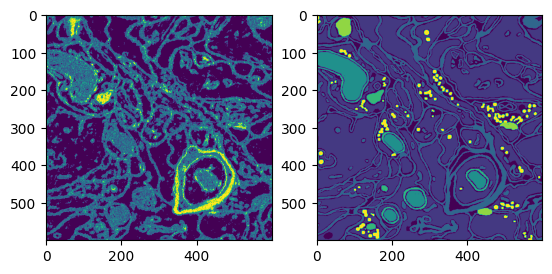

In [12]:
predict_and_eval(train_data, train_labels, 600)

Mutual information 0.3494109849386581
Rand score 0.4111682127586357


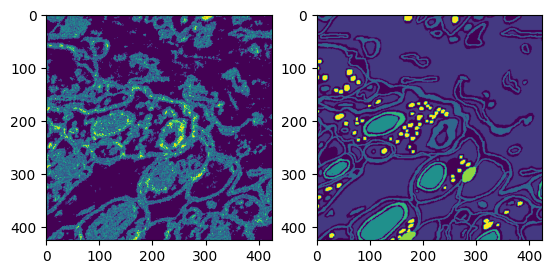

In [13]:
predict_and_eval(test_data, test_labels, 425)